In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
import requests
import io
np.set_printoptions(suppress=True)
import datetime

In [113]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
#df = pd.read_csv("us-states.csv")
df['date'] = pd.to_datetime(df['date'])

df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
2772,2020-04-21,Virginia,51,9630,325
2773,2020-04-21,Washington,53,12345,683
2774,2020-04-21,West Virginia,54,929,26
2775,2020-04-21,Wisconsin,55,4620,243


In [0]:
state_cases = df.copy()

In [0]:
state_cases = state_cases.drop(['fips'], axis=1)
state_cases = state_cases.drop(['date'], axis=1)


In [116]:

cumSum_cases = state_cases.groupby('state').tail(1)
cumSum_cases

,state,cases,deaths
2721,Alabama,5327,186
2722,Alaska,327,7
2723,American Samoa,0,0
2724,Arizona,5251,213
2725,Arkansas,2262,43
2726,California,35844,1316
2727,Colorado,10447,484
2728,Connecticut,20360,1423
2729,Delaware,2931,82
2730,District of Columbia,3098,112


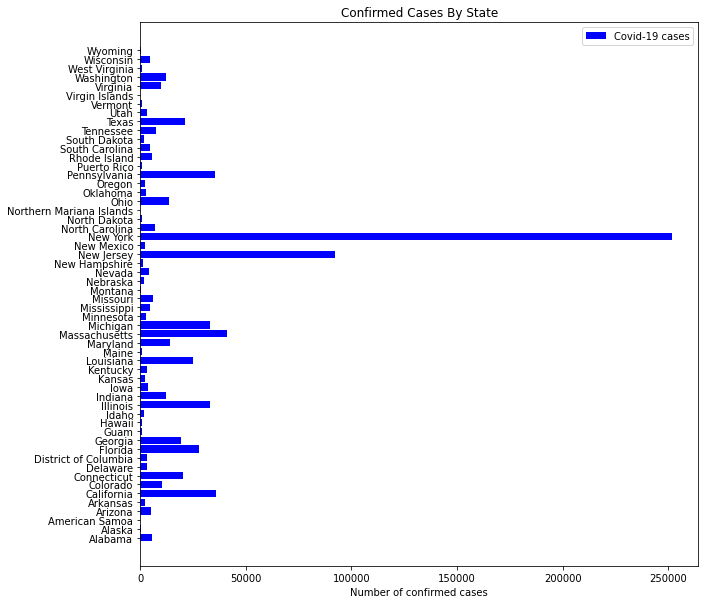

In [117]:
objects = (cumSum_cases['state'])

y_pos = np.arange(len(objects))

stateCases = cumSum_cases['cases']

plt.figure(figsize=(10,10))
plt.ticklabel_format(style = 'plain')

plt.barh(y_pos ,stateCases, align='center', color = 'blue' , label='Covid-19 cases')

plt.yticks(y_pos, objects)
plt.xlabel('Number of confirmed cases')
plt.title('Confirmed Cases By State')

plt.legend()

plt.show()

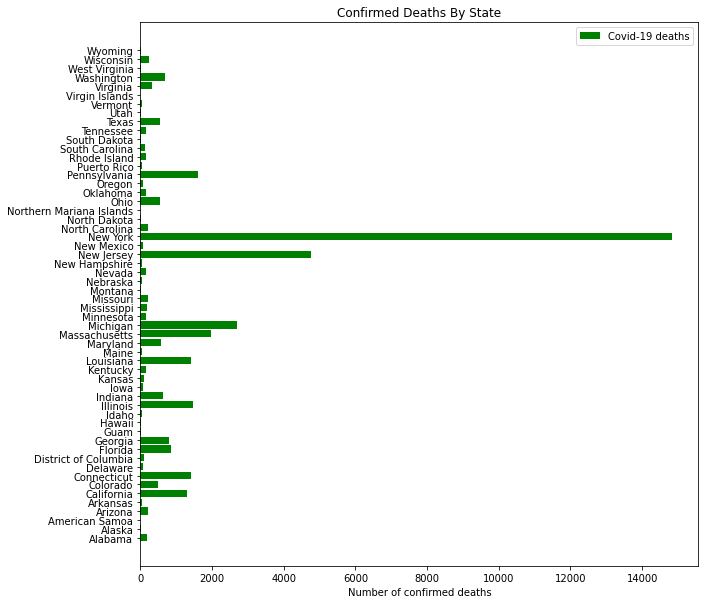

In [118]:
objects = (cumSum_cases['state'])

y_pos = np.arange(len(objects))

stateDeaths = cumSum_cases['deaths']

plt.figure(figsize=(10,10))
plt.ticklabel_format(style = 'plain')

plt.barh(y_pos ,stateDeaths, align='center', color = 'green' , label='Covid-19 deaths')

plt.yticks(y_pos, objects)
plt.xlabel('Number of confirmed deaths')
plt.title('Confirmed Deaths By State')

plt.legend()

plt.show()

In [0]:
df = df.drop(['fips'], axis=1)
df = df.drop(['state'], axis=1)

In [0]:
df = df.set_index(['date'])

In [121]:
# df = df.drop(['state'], axis=1)
df = df.drop(['deaths'], axis=1)
df

,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-24,1
...,...
2020-04-21,9630
2020-04-21,12345
2020-04-21,929


In [122]:
print(df.isnull().values.sum())

0


In [123]:
print(df.isnull().sum())

cases    0
dtype: int64


In [124]:
# drop row if any row value has NAN
df.dropna(how='any')

,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-24,1
...,...
2020-04-21,9630
2020-04-21,12345
2020-04-21,929


In [125]:
daily = df.groupby('date')['cases'].sum()
daily

date
2020-01-21         1
2020-01-22         1
2020-01-23         1
2020-01-24         2
2020-01-25         3
               ...  
2020-04-17    699853
2020-04-18    728094
2020-04-19    753314
2020-04-20    780449
2020-04-21    805771
Name: cases, Length: 92, dtype: int64

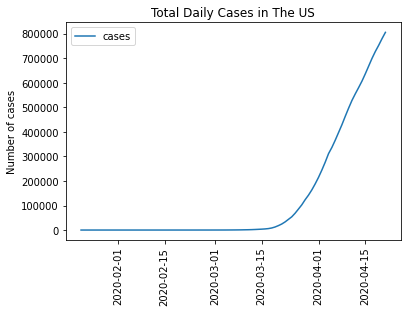

In [126]:
# plt.plot(daily)
#plt.figure(figsize=(12,6))
plt.title('Total Daily Cases in The US')
plt.ylabel('Number of cases')
plt.xticks(rotation='vertical')
plt.plot(daily, label='cases')
plt.legend()

In [127]:
# how many cases are discovered in each particular day
daily = daily.diff().fillna(daily[0]).astype(np.int64)
daily

date
2020-01-21        1
2020-01-22        0
2020-01-23        0
2020-01-24        1
2020-01-25        1
              ...  
2020-04-17    31320
2020-04-18    28241
2020-04-19    25220
2020-04-20    27135
2020-04-21    25322
Name: cases, Length: 92, dtype: int64

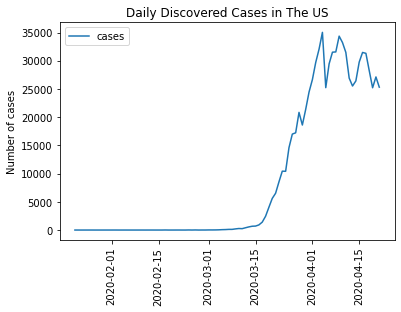

In [128]:
plt.title('Daily Discovered Cases in The US')
plt.ylabel('Number of cases')
plt.xticks(rotation='vertical')
plt.plot(daily, label='cases')
plt.legend()

In [129]:
# training data from the beginning to March 31, and getting the column
training = daily.loc[:'2020-03-31']
training

date
2020-01-21        1
2020-01-22        0
2020-01-23        0
2020-01-24        1
2020-01-25        1
              ...  
2020-03-27    17232
2020-03-28    20852
2020-03-29    18613
2020-03-30    21395
2020-03-31    24460
Name: cases, Length: 71, dtype: int64

In [130]:
training.shape

(71,)

In [131]:
# remaing data for testing
testing = daily.loc['2020-04-01':]
testing

date
2020-04-01    26662
2020-04-02    29712
2020-04-03    32078
2020-04-04    35035
2020-04-05    25235
2020-04-06    29456
2020-04-07    31521
2020-04-08    31568
2020-04-09    34368
2020-04-10    33230
2020-04-11    31483
2020-04-12    26930
2020-04-13    25526
2020-04-14    26432
2020-04-15    29771
2020-04-16    31477
2020-04-17    31320
2020-04-18    28241
2020-04-19    25220
2020-04-20    27135
2020-04-21    25322
Name: cases, dtype: int64

In [132]:
testing.shape

(21,)

**Preparing the training data**: first 7 days into input vector, then the next as output vector y, so collecting 1st 7 days to predict the next 7 days

In [0]:
training = np.array(training)

In [0]:
X_train, y_train = list(), list()

for i in range(7, len(training) - 7):
  X_train.append(training[i-7:i])
  y_train.append(training[i:i+7])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [136]:
X_train.shape, y_train.shape

((57, 7), (57, 7))

In [137]:
pd.DataFrame(X_train).head() # 1st row has the 1st 7 days of data, next row has the next 7 days; it's a sliding window

,0,1,2,3,4,5,6
0,1,0,0,1,1,2,0
1,0,0,1,1,2,0,0
2,0,1,1,2,0,0,0
3,1,1,2,0,0,0,1
4,1,2,0,0,0,1,1


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler = scaler.fit(np.expand_dims(training, axis=1))
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)


In [139]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.000715,0.00000,0.000000,0.000178,0.000153,0.000234,0.000000
1,0.000000,0.00000,0.000248,0.000178,0.000307,0.000000,0.000000
2,0.000000,0.00041,0.000248,0.000357,0.000000,0.000000,0.000000
3,0.000715,0.00041,0.000495,0.000000,0.000000,0.000000,0.000096
4,0.000715,0.00082,0.000000,0.000000,0.000000,0.000117,0.000096


In [140]:
X_train.shape

(57, 7)

In [141]:
X_train = X_train.reshape(57, 7, 1)
X_train.shape

(57, 7, 1)

In [0]:
# y_train = y_train.reshape(57, 7, 1)
# y_train.shape

**Building the MLP regressor model**

In [147]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=57)
#model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


SyntaxError: ignored

In [144]:
# training the model
model.fit(X_train, y_train, epochs= 100)

ValueError: ignored

In [0]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=0, n_estimators=100)
ada.fit(X_train, y_train)

In [0]:
y_pred_ada = ada.predict(X_test)

In [0]:
true = scaler.inverse_transform(np.expand_dims(y_test.flatten(), axis=0)).flatten()
predicted = scaler.inverse_transform(np.expand_dims(y_pred_ada.flatten(), axis=0)).flatten()


# daily cases going back 10 days
plt.plot(daily.index[:len(training)], scaler.inverse_transform(training).flatten(), label='Graphed Cases (-10 days)')

plt.plot(daily.index[len(training):len(training) + len(true)], true, label='True cases')
plt.plot(daily.index[len(training):len(training) + len(true)], predicted, label='Predicted cases')

plt.legend()

In [0]:
# Calculate the absolute errors
errors = abs(predicted - true)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print()
mse = mean_squared_error(y_test, ada.predict(X_test))
print("MSE: %.4f" % mse)

In [0]:
# model.fit(X_train, y_train, epochs=30, verbose=0)

In [0]:
# y_pred_seqt = model.predict(X_test)

In [0]:
# true = scaler.inverse_transform(np.expand_dims(y_test.flatten(), axis=0)).flatten()
# predicted = scaler.inverse_transform(np.expand_dims(y_pred_seqt.flatten(), axis=0)).flatten()

# # daily cases going back 10 days
# plt.plot(daily.index[:len(training)], scaler.inverse_transform(training).flatten(), label='Graphed Cases (-10 days)')

# plt.plot(daily.index[len(training):len(training) + len(true)], true, label='True cases')
# plt.plot(daily.index[len(training):len(training) + len(true)], predicted, label='Predicted cases')

# plt.legend()

In [0]:
# Calculate the absolute errors
errors = abs(predicted - true)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print()
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)